In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To print more on screen
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
# !pip install -U kaleido

In [3]:
# Data Preparation and Cleaning

df_listings = pd.read_csv('/kaggle/input/san-francisco-airbnb-listings/listings.csv')

In [4]:
# filter only essential columns.
df_listings_1 = df_listings[['name','summary','space','description','neighborhood_overview','transit','access','interaction','house_rules',
                             'host_location','host_about','host_response_time','host_response_rate','host_neighbourhood',
                             'host_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','street',
                             'neighbourhood','neighbourhood_cleansed','city','state','zipcode','market','smart_location','country_code',
                             'country','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms',
                             'bedrooms','beds','bed_type','amenities','square_feet','price','jurisdiction_names','reviews_per_month'
                             ,'review_scores_rating']]
df_listings_1.head()

,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,jurisdiction_names,reviews_per_month,review_scores_rating
0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,Duboce Triangle,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"{""SAN FRANCISCO""}",1.74,97.0
1,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,"San Francisco, California, United States",I am a retired software developer now raising ...,within an hour,100%,Inner Sunset,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,San Francisco,"San Francisco, CA",US,United States,37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",NaN,$99.00,"{""SAN FRANCISCO""}",1.28,94.0
2,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...","San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,80%,Bernal Heights,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,San Francisco,"San Francisco, CA",US,United States,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",NaN,$235.00,"{""SAN FRANCISCO""}",0.87,98.0
3,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...","San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within an hour,86%,Cole Valley,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""F

In [5]:
# Fill the Nan values with Zeros.
df_listings_1.fillna(0, inplace = True)

# Removing '$' from price.
prices_df = df_listings_1['price']
prices = []

for p in prices_df:
    # slicing the '$' of the string.
    p1 = float(p[1:].replace(',',''))
    prices.append(p1)

df_listings_1['price_dollar'] = prices
df_listings_1.head(1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,jurisdiction_names,reviews_per_month,review_scores_rating,price_dollar
0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,Duboce Triangle,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0.0,$170.00,"{""SAN FRANCISCO""}",1.74,97.0,170.0


In [6]:
# Removes the listings having 0 value for Bedroom, Bathroom, Accomadation, price, beds, review_scores_rating, reviews_per_month.
df_listings_1 = df_listings_1[df_listings_1['accommodates'] > 0]
df_listings_1 = df_listings_1[df_listings_1['bathrooms'] > 0]
df_listings_1 = df_listings_1[df_listings_1['bedrooms'] > 0]
df_listings_1 = df_listings_1[df_listings_1['beds'] > 0]
df_listings_1 = df_listings_1[df_listings_1['price_dollar'] > 0]
df_listings_1 = df_listings_1[df_listings_1['reviews_per_month'] > 0]

df_listings_1.head(1)

,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,jurisdiction_names,reviews_per_month,review_scores_rating,price_dollar
0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,Duboce Triangle,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0.0,$170.00,"{""SAN FRANCISCO""}",1.74,97.0,170.0


### **Q1. Features, Facilities, and ammenities influence the popularity of listing.**

### 1. Room Type

In [7]:
# Room Type.
print("Differnt Room Types:", df_listings_1['room_type'].nunique())
print()
# print(df_listings_1['room_type'].unique())
print(df_listings_1['room_type'].value_counts())

Differnt Room Types: 4

Entire home/apt    3214
Private room       2279
Shared room         130
Hotel room          125
Name: room_type, dtype: int64


In [8]:
# !pip install -U kaleido
# plot number of listings vs type of rooms
fig = px.bar(df_listings_1, x = df_listings_1['room_type'].unique(),
             y = list(df_listings_1['room_type'].value_counts()),
             labels = {'x':'Room Type', 'y':'Number of listings'},
             title="Type of Rooms vs Number of listings",text_auto = True)
fig.show()
fig.write_html("/kaggle/working/number_of_listings_vs_room_type")

### 2. Property Type

In [9]:
# property type
print("Different Property types :", df_listings_1['property_type'].nunique())
print()

# Number of listings under each Property Type.
print(df_listings_1['property_type'].value_counts())

Different Property types : 23

Apartment             2029
House                 1937
Condominium            674
Guest suite            457
Townhouse              118
Boutique hotel         113
Loft                    82
Hostel                  61
Hotel                   57
Serviced apartment      51
Aparthotel              34
Bed and breakfast       34
Guesthouse              30
Other                   19
Bungalow                12
Cottage                 11
Resort                   9
Villa                    8
Castle                   4
Tiny house               3
Earth house              2
Cabin                    2
Dome house               1
Name: property_type, dtype: int64


In [10]:
# plot number of listings vs type of rooms
fig = px.bar(df_listings_1, x = df_listings_1['property_type'].unique(),
             y = list(df_listings_1['property_type'].value_counts()),
             labels = {'x':'Property Type', 'y':'Number of listings'},
             title="Type of Property vs Number of listings", text_auto = True)
fig.show()

In [11]:
# Analyzing prices for the different room and property types.
room_property_DF = df_listings_1.groupby(['room_type', 'property_type'])['price_dollar'].mean()
room_property_DF = room_property_DF.reset_index()
room_property_DF = room_property_DF.sort_values('price_dollar', ascending = [0])
room_property_DF.head()

,room_type,property_type,price_dollar
18,Entire home/apt,Villa,2482.000000
8,Entire home/apt,Earth house,600.000000
24,Hotel room,Resort,591.000000
0,Entire home/apt,Aparthotel,566.000000
43,Private room,Resort,432.285714


In [12]:
source = df_listings_1.groupby(['property_type', 'room_type'])['price_dollar'].mean().unstack()
fig = px.imshow(source, text_auto = True, labels = {'x':'Room Type', 'y':'Property Type'})
fig.update_layout(autosize=False,width=400,height=1000,title="Price Heatmap of Property & Room Type")
fig.show()

##### Darker the color, cheaper the price and vice versa. We can observe that Entire House are lighest, hence most expensive.

### 3. Number of Bedrooms

In [13]:
# plot to find trend between prices and number of bedroom.
fig = px.box(df_listings_1,x = 'bedrooms', y = 'price_dollar',labels = {'x':'Room Type', 'y':'Property Type'})
fig.update_layout(autosize=False,width=1000,height=1000,title="Prices Vs Number of Bedrooms")
fig.show()

There is trend between Number of Bedrooms and Prices. So, we will further analyse number of bedroom with Property Type.

In [14]:
# Number of Bedrooms vs Property type
no_room_df = df_listings_1[['property_type', 'bedrooms']]
no_room_df.head()

,property_type,bedrooms
0,Apartment,1.0
1,House,1.0
2,Apartment,2.0
3,Apartment,1.0
4,Apartment,1.0


Swarmplot works best in a classification problem where there are many independent features. It is similar to a scatterplot but here the datapoints does not overlap, hence we can get a clear insight in the distribution of classes among all the features.

In [15]:
# swarm plot
fig = px.strip(data_frame=no_room_df, x = 'bedrooms', y = 'property_type')
fig.update_layout(title="Property Type Vs Number of Bedrooms")
fig.show()

From the above plot, we can observe that as number of listings decrease as the number of Bedrooms increase.

In [16]:
# Plot heatmap of prices with number of bedrooms for listings.
source = df_listings_1.groupby(['property_type', 'bedrooms'])['price_dollar'].mean().unstack()
fig = px.imshow(source, text_auto = True, labels = {'x':'No. Bedrooms', 'y':'Property Type', 'color':'Price'})
fig.update_layout(autosize=False,width=700,height=1000,title="Price Heatmap of Property Type & No. of Bedrooms")
fig.show()

We can observe that the prices increase as the number of Bedrooms increases. Except for one listing which has 14 rooms. Lets find out why is this case.

In [17]:
# Number of Bedrooms.
print("Number of Bedrooms:", df_listings_1['bedrooms'].nunique())
print()
print("No. Bedrooms : Listings")
print(df_listings_1['bedrooms'].value_counts())

Number of Bedrooms: 8

No. Bedrooms : Listings
1.0     3801
2.0     1153
3.0      592
4.0      162
5.0       30
6.0        8
14.0       1
7.0        1
Name: bedrooms, dtype: int64


AS we can see that there is only 1 listing with 14 bedrooms. So, it can be seen as an anamoly and ignored. So the trend observed is that price of listings increases with no. bedrooms.

So far, we have ibserved that room type, property type, and number of bedrooms have soem effect on price of listing.

We will now analyse if any specific ammentites in the prporty results in higher prices.

### 4. Ammenities

We are going to analyse textual data of ammenitites by finding the words that appear most frequently.

In [18]:
import nltk
# To download nltk library.
nltk.download('omw-1.4')

from nltk.corpus import stopwords
import re

ammenities_df = df_listings_1[['amenities', 'price_dollar']]
ammenities_df_Exp = ammenities_df.sort_values('price_dollar',ascending=False)
ammenities_df_Exp_100 = ammenities_df_Exp.head(100)
# print(ammenities_df_Exp_100)

# create a string of ammenities.
all_amenities = ""
for idx, val in ammenities_df_Exp_100.iterrows():
    p = re.sub('[^a-zA-Z]+', ' ', val['amenities'])
    all_amenities += p

all_amenities_data = nltk.word_tokenize(all_amenities)
filtered_data = [word for word in all_amenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
all_amenities_data = [wnl.lemmatize(data) for data in filtered_data]
all_amenities_words = ' '.join(all_amenities_data)

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


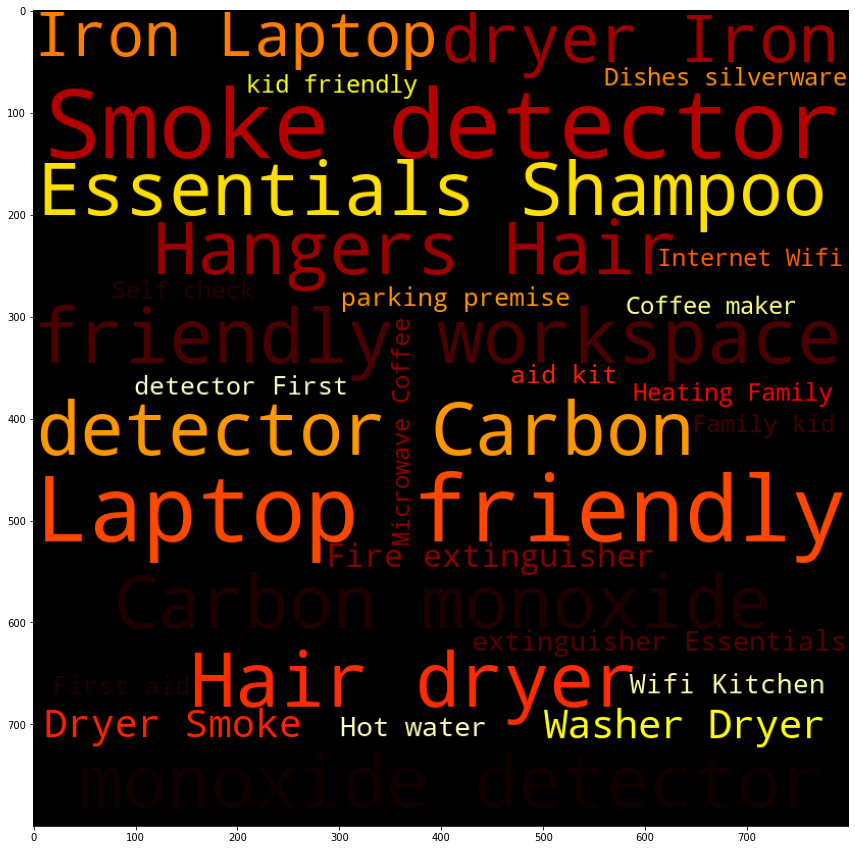

<Figure size 432x288 with 0 Axes>

In [22]:
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(background_color='black',random_state=1,colormap='hot',max_font_size=800,min_font_size=20,
                       width=800,height=800).generate(all_amenities_words)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
# plt.axis("off")
plt.show()
plt.savefig(f"/kaggle/working/amenities_word_cloud.png",
            dpi = 300)

From the above wordcloud we can observe that the listings with highest prices have amenities such as 'Smoke Detector', 'Friendly Workspace', 'Hair Dryer', Essentials, 'Shampoo', 'Laptop Friendly'. Since the data used is from 2020, during the pandemic we can observe amenitites having a workspaces have high prices. 